In [1]:
%%bash
mkdir -p ./laplacian_prior

In [2]:
%%bash
cat > ./laplacian_prior/laplacian_prior.stan << EOF
data {
    real psi;
}

parameters {
    real B;
    real<lower=0.001> s;
}

model {
    B ~ normal(0,s);
    s ~ exponential(psi);
}
EOF

In [3]:
%%bash
### load modules
module load gcc
module load tbb

### set directory
STAN_PATH=/data/reddylab/Kuei/exe/cmdstan
FD_WRK=$(pwd)
echo $FD_WRK

### compile model
make -C $STAN_PATH ${FD_WRK}/laplacian_prior/laplacian_prior

/gpfs/fs1/data/reddylab/Kuei/learn/learn_stan
make: Entering directory `/gpfs/fs1/data/reddylab/Kuei/exe/cmdstan'

--- Translating Stan model to C++ code ---
bin/stanc  --o=/gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/laplacian_prior/laplacian_prior.hpp /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/laplacian_prior/laplacian_prior.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include   -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_5.7.0/include    -DBOOST_DISABLE_ASSERTS         -c -Wno-ignored-attributes   -x c++ -o /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/laplacian_prior/laplacian_prior.o /gpfs/fs1/data/reddylab/Kuei/learn/learn_stan/laplacian_prior/laplacian_prior.hpp
g++ -std=c++1y -pthread -D_REENTRANT -Wno-

In [4]:
import numpy as np
import json

In [5]:
### generate data file
for idx, psi in enumerate([0.1, 1, 10]):
    dct = {"psi": psi}
    
    ### store the data
    fpath = "./laplacian_prior/psi" + str(idx) + ".json"
    with open(fpath, "w") as file:
        json.dump(dct, file)

In [8]:
%%bash
ls ./laplacian_prior/psi*

./laplacian_prior/psi0.json
./laplacian_prior/psi1.json
./laplacian_prior/psi2.json


In [10]:
%%bash
cat ./laplacian_prior/psi*

{"psi": 0.1}{"psi": 1}{"psi": 10}

In [11]:
%%bash
module load gcc
./laplacian_prior/laplacian_prior sample \
    thin=1 num_samples=1000 num_warmup=50 \
    data   file=./laplacian_prior/psi0.json \
    output file=./laplacian_prior/output0.csv > ./laplacian_prior/log0.txt

In [12]:
%%bash
module load gcc
./laplacian_prior/laplacian_prior sample \
    thin=1 num_samples=1000 num_warmup=50 \
    data   file=./laplacian_prior/psi1.json \
    output file=./laplacian_prior/output1.csv > ./laplacian_prior/log1.txt

In [13]:
%%bash
module load gcc
./laplacian_prior/laplacian_prior sample \
    thin=1 num_samples=1000 num_warmup=50 \
    data   file=./laplacian_prior/psi2.json \
    output file=./laplacian_prior/output2.csv > ./laplacian_prior/log2.txt

In [14]:
cat ./laplacian_prior/log0.txt

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./laplacian_prior/psi0.json
init = 2 (Default)
random
  seed = 3005149479 (Default)
output
  file = ./laplacian_prior/output0.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evaluation took 4.5e-05 seconds

In [15]:
cat ./laplacian_prior/log1.txt

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./laplacian_prior/psi1.json
init = 2 (Default)
random
  seed = 3005158512 (Default)
output
  file = ./laplacian_prior/output1.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evaluation took 1.3e-05 seconds

In [16]:
cat ./laplacian_prior/log2.txt

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./laplacian_prior/psi2.json
init = 2 (Default)
random
  seed = 3005167328 (Default)
output
  file = ./laplacian_prior/output2.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evaluation took 1.4e-05 seconds

## Visualizing hierarchical prior: plot Laplace priors

In [22]:
%%time
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: user 94.6 ms, sys: 0 ns, total: 94.6 ms
Wall time: 1.35 s


In [4]:
!ls ./laplacian_prior

laplacian_prior       log0.txt	output0.csv  psi0.json
laplacian_prior.hpp   log1.txt	output1.csv  psi1.json
laplacian_prior.stan  log2.txt	output2.csv  psi2.json


In [10]:
dat_out0 = az.from_cmdstan(posterior="./laplacian_prior/output0.csv") # psi = 0.1
dat_out1 = az.from_cmdstan(posterior="./laplacian_prior/output1.csv") # psi = 1
dat_out2 = az.from_cmdstan(posterior="./laplacian_prior/output2.csv") # psi = 10

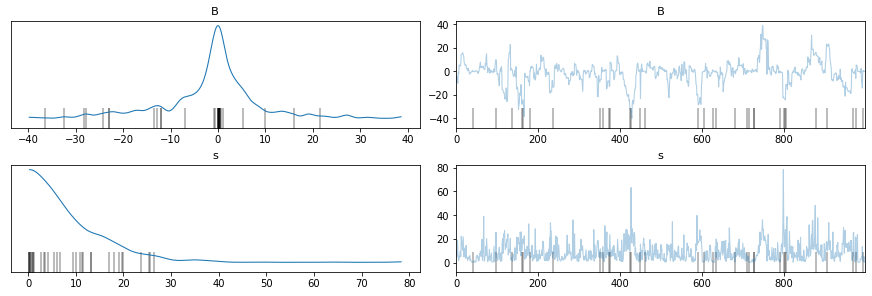

In [14]:
az.plot_trace(dat_out0)
plt.show()

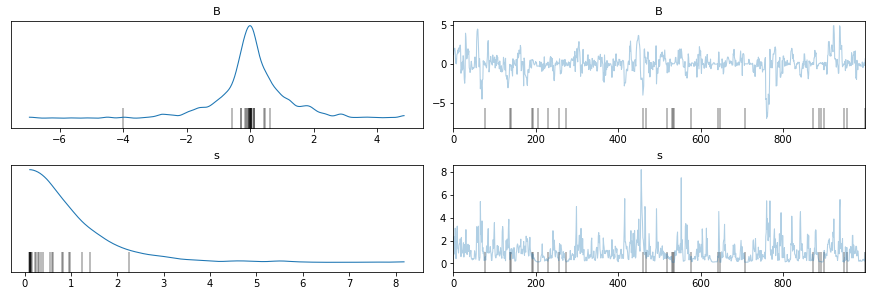

In [15]:
az.plot_trace(dat_out1)
plt.show()

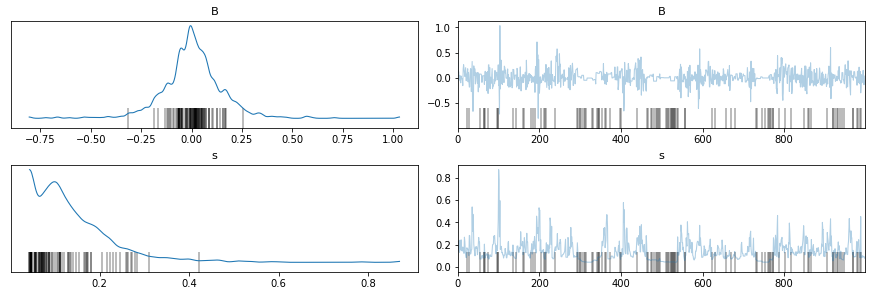

In [16]:
az.plot_trace(dat_out2)
plt.show()

In [20]:
dat_out0.values

<bound method InferenceData.values of Inference data with groups:
	> posterior
	> sample_stats>

In [44]:
#b0 = dat_out0.posterior.data_vars.get("B").values
b0 = dat_out0.posterior.data_vars.get("B").to_series()
b1 = dat_out1.posterior.data_vars.get("B").to_series()
b2 = dat_out2.posterior.data_vars.get("B").to_series()

In [45]:
print(type(b0))
print(b0.shape)

<class 'pandas.core.series.Series'>
(1000,)


<AxesSubplot:xlabel='B', ylabel='Density'>

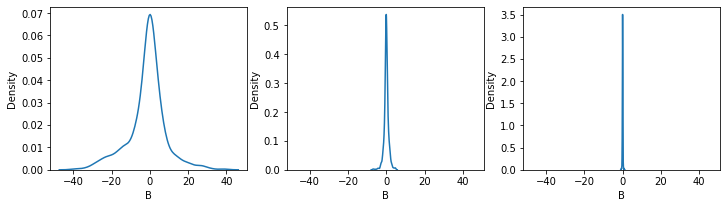

In [47]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 3), sharex=True)
sns.kdeplot(b0, ax=axes[0])
sns.kdeplot(b1, ax=axes[1])
sns.kdeplot(b2, ax=axes[2])